# EPL 2022-2023 DATA ANALYSIS

### Importing the libraries

In [24]:
import pandas as pd

import numpy as np 

import re

### Importing the Datasets

In [25]:
df = pd.read_csv('EPL Data.csv')

df.head()

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30


### Top Performing Teams

In [41]:
# Top Teams by Points
top_teams_points = df.sort_values(by='points', ascending = False).head(20)

print("Top teams by points:\n", top_teams_points[['team.name', 'points']])

Top teams by points:
             team.name  points
0     Manchester City      89
1             Arsenal      84
2   Manchester United      75
3           Newcastle      71
4           Liverpool      67
5            Brighton      62
6         Aston Villa      61
7           Tottenham      60
8           Brentford      59
9              Fulham      52
10     Crystal Palace      45
11            Chelsea      44
12             Wolves      41
13           West Ham      40
14        Bournemouth      39
15  Nottingham Forest      38
16            Everton      36
17          Leicester      34
18              Leeds      31
19        Southampton      25


In [42]:
# Top Teams by goals scored
top_teams_goals = df.sort_values(by='goals_for', ascending= False).head(20)

print("Top teams by goals scored:\n", top_teams_goals[['team.name', 'goals_for']] )


Top teams by goals scored:
             team.name  goals_for
0     Manchester City         94
1             Arsenal         88
4           Liverpool         75
5            Brighton         72
7           Tottenham         70
3           Newcastle         68
2   Manchester United         58
8           Brentford         58
9              Fulham         55
6         Aston Villa         51
17          Leicester         51
18              Leeds         48
13           West Ham         42
10     Crystal Palace         40
15  Nottingham Forest         38
11            Chelsea         38
14        Bournemouth         37
19        Southampton         36
16            Everton         34
12             Wolves         31


In [43]:
# Top teams by goal Difference
top_teams_goal_diff = df.sort_values(by='goalsDiff', ascending=False).head(20)

print('Top teams by goal difference:\n', top_teams_goal_diff[['team.name', 'goalsDiff']])

Top teams by goal difference:
             team.name  goalsDiff
0     Manchester City         61
1             Arsenal         45
3           Newcastle         35
4           Liverpool         28
5            Brighton         19
2   Manchester United         15
8           Brentford         12
7           Tottenham          7
6         Aston Villa          5
9              Fulham          2
11            Chelsea         -9
10     Crystal Palace         -9
13           West Ham        -13
17          Leicester        -17
16            Everton        -23
12             Wolves        -27
15  Nottingham Forest        -30
18              Leeds        -30
14        Bournemouth        -34
19        Southampton        -37


### Home Vs Away Wins

In [49]:
# Computing Home Vs Away Wins
df['home_performance'] = df['home_wins']

df['away_performance'] = df['away_wins']

# Comparing Home to Away Perfomance

home_vs_away_wins = df[['team.name', 'home_performance', 'away_performance']]

print(home_vs_away_wins)



            team.name  home_performance  away_performance
0     Manchester City                17                11
1             Arsenal                14                12
2   Manchester United                15                 8
3           Newcastle                11                 8
4           Liverpool                13                 6
5            Brighton                10                 8
6         Aston Villa                12                 6
7           Tottenham                12                 6
8           Brentford                10                 5
9              Fulham                 8                 7
10     Crystal Palace                 7                 4
11            Chelsea                 6                 5
12             Wolves                 9                 2
13           West Ham                 8                 3
14        Bournemouth                 6                 5
15  Nottingham Forest                 8                 1
16            

### Home Vs Away Losses

In [50]:
# Computing Home Vs Away Losses
df['home_losses'] = df['home_lose']

df['away_losses'] = df['away_lose']

# Comparing Home Vs Away Losses

home_vs_away_losses = df[['team.name', 'home_losses', 'away_losses']]

print(home_vs_away_losses)

            team.name  home_losses  away_losses
0     Manchester City            1            4
1             Arsenal            2            4
2   Manchester United            1            8
3           Newcastle            2            3
4           Liverpool            1            8
5            Brighton            5            7
6         Aston Villa            5            8
7           Tottenham            6            8
8           Brentford            2            7
9              Fulham            6           10
10     Crystal Palace            5           10
11            Chelsea            6           10
12             Wolves            7           12
13           West Ham            7           13
14        Bournemouth            9           12
15  Nottingham Forest            5           13
16            Everton           10            8
17          Leicester           10           12
18              Leeds            7           14
19        Southampton           12      

### Home Vs Away Draws


In [51]:
# Comparing home vs away draws

home_vs_away_draws = df[['team.name', 'home_draw', 'away_draw']]

print(home_vs_away_draws)

            team.name  home_draw  away_draw
0     Manchester City          1          4
1             Arsenal          3          3
2   Manchester United          3          3
3           Newcastle          6          8
4           Liverpool          5          5
5            Brighton          4          4
6         Aston Villa          2          5
7           Tottenham          1          5
8           Brentford          7          7
9              Fulham          5          2
10     Crystal Palace          7          5
11            Chelsea          7          4
12             Wolves          3          5
13           West Ham          4          3
14        Bournemouth          4          2
15  Nottingham Forest          6          5
16            Everton          3          9
17          Leicester          4          3
18              Leeds          7          3
19        Southampton          5          2


### Correlation Analysis

In [52]:
# We try to establish the correlation betweem different Metrics

# Calculate the correlation Matrix

correlation_matrix = df[['points', 'goals_for', 'goals_against', 'home_wins', 'away_wins']].corr()

print("correlation matrix:\n", correlation_matrix)

correlation matrix:
                  points  goals_for  goals_against  home_wins  away_wins
points         1.000000   0.879433      -0.827466   0.946076   0.887888
goals_for      0.879433   1.000000      -0.582490   0.791336   0.862827
goals_against -0.827466  -0.582490       1.000000  -0.745610  -0.686220
home_wins      0.946076   0.791336      -0.745610   1.000000   0.727859
away_wins      0.887888   0.862827      -0.686220   0.727859   1.000000


### Findings from the Correlation Analysis

##### Team Performance
###### Successful teams (in terms of points) typically score more goals and concede fewer     goals. They also tend to perform well both at home and away.


##### Offensive and Defensive Balance
###### There is a notable correlation between goals scored and goals conceded, indicating that teams strong in one aspect are often strong in the other.

##### Home vs. Away Performance
###### Teams that do well at home generally also perform well away, highlighting the importance of overall team quality and consistency.

### Team Performance Distribution

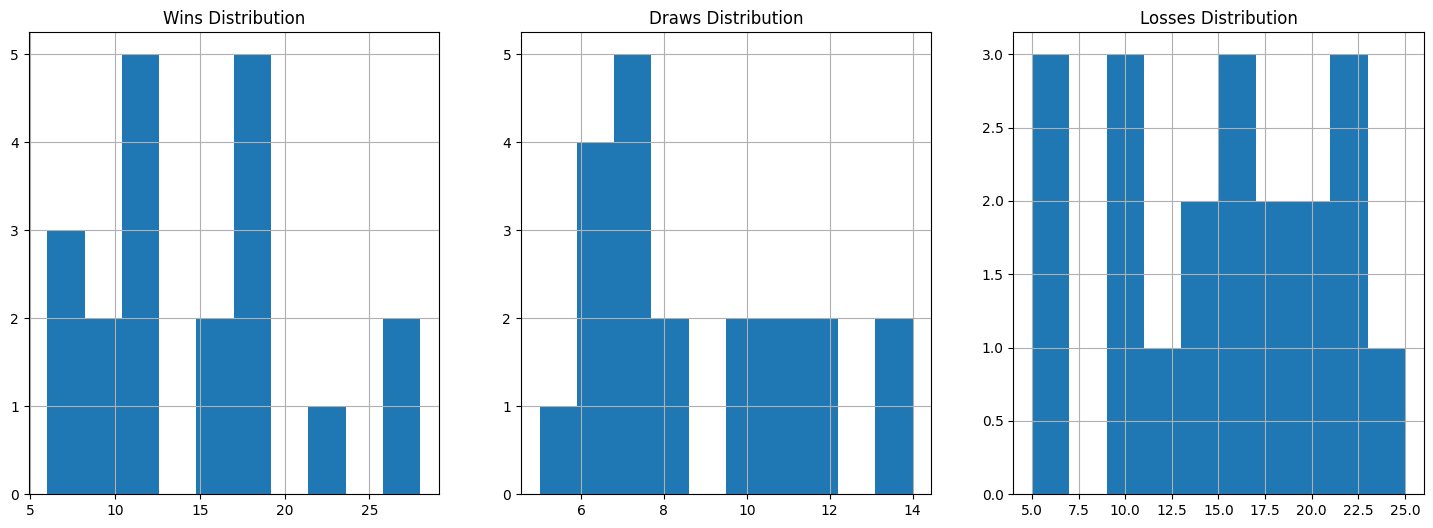

In [54]:
import matplotlib.pyplot as plt 

# Plot Distribution of wins, draws, and losses

fig, ax = plt.subplots(1,3, figsize= (18, 6))

df['wins'].hist(ax=ax[0], bins=10)
ax[0].set_title('Wins Distribution')

df['draws'].hist(ax=ax[1], bins=10)
ax[1].set_title('Draws Distribution')

df['losses'].hist(ax=ax[2], bins=10)
ax[2].set_title('Losses Distribution')

plt.show()


#### Wins Distribution
##### Range: The number of wins ranges from 5 to 25.
##### Clusters: There are clusters of teams with wins around 5-10, 10-15, and 15-20.
##### Frequency: Several teams have around 5-10, 15-20, and 25 wins, with the most common win count being in the ranges 5-10 and 15-20.
##### Implication: This suggests that the league has a spread of team performances, with a few teams winning many matches (around 25) and others winning fewer (5-10).

#### Draws Distribution
##### Range: The number of draws ranges from 6 to 14.
##### Clusters: Most teams have around 6-8 draws.
##### Frequency: The most frequent draw counts are around 6-8, with fewer teams having draw counts higher than 10.
##### Implication: The distribution of draws is more concentrated, indicating that most teams draw a similar number of matches, typically between 6 and 8.

#### Losses Distribution
##### Range: The number of losses ranges from 5 to 25.
##### Clusters: There are clusters of teams with losses around 5-10, 10-15, 15-20, and 20-25.
##### Frequency: The distribution is more spread out compared to wins and draws, with teams distributed fairly evenly across the range of losses.
##### Implication: This suggests variability in team performance in terms of losses, with some teams losing very few matches and others losing many.



### General Implications


#### Team Performance Variability:

##### The wins histogram shows a wider spread, indicating that there are both dominant teams with many wins and weaker teams with fewer wins.
##### The draws histogram indicates that most teams have a moderate number of draws, suggesting some consistency in match outcomes across the league.
##### The losses histogram indicates a wide range of performances, with some teams losing many matches and others losing few.

#### League Competitiveness:

##### The distribution of wins and losses suggests a competitive league with a range of team strengths.
##### The concentrated distribution of draws indicates that while there is variability in wins and losses, the teams often end up with similar results in terms of draws.

#### Strategic Insights:

##### Teams aiming to improve their standings may look to reduce losses and convert draws into wins, especially since the draws are concentrated in a narrow range.
##### Analyzing the teams with the highest and lowest number of wins and losses can provide insights into successful strategies and common pitfalls.

### Comparative Analysis

In [56]:
# Comparing team performance using difference metrics

top_teams = df[df['rank'] <=4]

print("Comparison of top 3 Teams:\n", top_teams[['team.name', 'points', 'goals_for', 'goals_against', 'wins', 'draws', 'losses']])

Comparison of top 3 Teams:
            team.name  points  goals_for  goals_against  wins  draws  losses
0    Manchester City      89         94             33    28      5       5
1            Arsenal      84         88             43    26      6       6
2  Manchester United      75         58             43    23      6       9
3          Newcastle      71         68             33    19     14       5
